In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

#data
dset = pd.read_csv(r'C:\Users\meggouri ismail\Downloads\advertising.csv')
sales = np.array(dset['Sales']) #np.array(dset)[:,3:]
X1 = np.array(dset['TV']) #np.array(dset)[:,0:1]
X2 = np.array(dset['Radio']) #np.array(dset)[:,1:2]
X3 = np.array(dset['Newspaper']) #np.array(dset)[:,2:3]


In [3]:
scaler = StandardScaler()
data = scaler.fit_transform(dset)

In [4]:
X=data[:,:3] #features
y=data[:,3]  #target

In [5]:
#split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [6]:
x1_train=X_train[:,0]
x2_train=X_train[:,1]
x3_train=X_train[:,2]

In [7]:
#model --> yhat=bias+w1*X1+w2*X2+w3*X3
learning_rate=0.01
def fit(X1,X2,X3,y):
    bias=0
    w1=0
    w2=0
    w3=0
    n=len(y)
    global mseList
    mseList=[]
    #yhat=[]
    for i in range(100):
        yhat=bias+w1*X1+w2*X2+w3*X3
        err=y-yhat
        se=err**2
        mse=(1/n)*np.sum(se)
        mseList.append(mse)
        
        dbias=-(2/n)*np.sum(y-yhat)
        
        dw1=-(2/n)*np.sum(X1*(y-yhat))
        dw2=-(2/n)*np.sum(X2*(y-yhat))
        dw3=-(2/n)*np.sum(X3*(y-yhat))
        
        bias=bias-dbias*learning_rate
        
        w1=w1-dw1*learning_rate
        w2=w2-dw2*learning_rate
        w3=w3-dw3*learning_rate
        
        print(mse)
    return bias,w1,w2,w3

In [8]:
bias,w1,w2,w3=fit(x1_train,x2_train,x3_train,y_train)
#bias,w1=fit(X1,X2,X3,sales)
print(bias,w1,w2,w3)

1.1142244043276723
1.0678155836696768
1.0236365215123908
0.9815758707642619
0.9415280337487668
0.903392857142785
0.867075343445444
0.8324853780675964
0.7995374711827418
0.768150513528
0.738247545388871
0.7097555380441016
0.6826051869871894
0.6567307162789977
0.632069693421791
0.6085628541788117
0.5861539367954498
0.5647895251081987
0.544418900056042
0.5249938991357849
0.5064687833682007
0.48880011136581647
0.47194662011576327
0.4558691121124708
0.44053034849513456
0.42589494786392257
0.411929290466857
0.39860142746627236
0.38588099500978396
0.3737391328458251
0.3621484072381074
0.35108273794685274
0.3405173290573882
0.33042860344873787
0.3207941407062093
0.3115926182927137
0.3028037558036984
0.29440826214015187
0.2863877854431897
0.27872486564227705
0.2714028894772183
0.26440604786167243
0.25771929546315725
0.2513283123813159
0.24521946781264764
0.2393797855959841
0.2337969115387341
0.22845908242934107
0.2233550966465286
0.21847428628075
0.2138064906878363
0.2093420313991624
0.20507168

In [9]:
x1_test=X_test[:,0]
x2_test=X_test[:,1]
x3_test=X_test[:,2]
def predict(X1,X2,X3):
    return bias+w1*X1+w2*X2+w3*X3

In [10]:
yhat=predict(x1_test,x2_test,x3_test)
err=yhat-y_test
se=err**2
mse=np.mean(se)
mse

0.07439625818085652

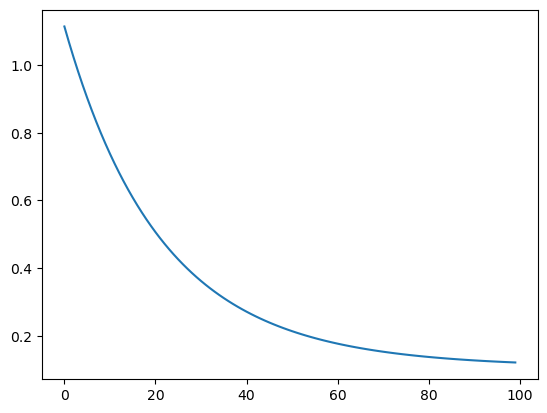

In [11]:
iters=[i for i in range(100)]
plt.plot(iters,mseList)